<h2> Imports </h2>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans,DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from datetime import datetime,date

In [ ]:
df = pd.read_csv('bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
df.shape

(1048567, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1046198.0,115403.540056,846485.380601,0.0,4721.76,16792.18,57657.36,1.150355e+08
TransactionTime,1048567.0,157087.529393,51261.854022,0.0,124030.00,164226.00,200010.00,2.359590e+05
TransactionAmount (INR),1048567.0,1574.335003,6574.742978,0.0,161.00,459.03,1200.00,1.560035e+06


**Discover how many nulls in each column**

In [ ]:
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

**Drop all rows that have nulls**

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

**To know the count of each value in column**

In [ ]:
df['CustGender'].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [ ]:
df['CustomerDOB'].value_counts()

CustomerDOB
1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
1/2/44          1
11/1/48         1
6/1/40          1
6/6/42          1
25/6/52         1
Name: count, Length: 17233, dtype: int64

In [ ]:
df = df.drop(df[df['CustomerDOB'] == '1/1/1800'].index,axis = 0)

In [ ]:
df['CustomerDOB'].value_counts()

CustomerDOB
1/1/89      809
1/1/90      784
6/8/91      698
1/1/91      665
1/1/92      631
           ... 
23/11/30      1
7/3/04        1
31/7/53       1
20/10/39      1
22/3/51       1
Name: count, Length: 17232, dtype: int64

**Convert values in "CustomerDOB" column to datetime data type**

In [ ]:
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"])
df

C:\Users\Shahe\AppData\Local\Temp\ipykernel_24752\2080729413.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"])


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


**Substitute any year more than or equal 2022 by 100**

In [ ]:
df.loc[df.CustomerDOB.dt.year >= 2025, 'CustomerDOB']

1         2057-04-04
3         2073-09-14
5         2072-08-10
15        2068-10-07
30        2067-01-21
             ...    
1048506   2070-09-20
1048510   2048-07-15
1048536   2033-05-10
1048544   2071-05-10
1048552   2071-08-21
Name: CustomerDOB, Length: 104790, dtype: datetime64[ns]

In [ ]:
df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] = df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] - pd.DateOffset(years = 100)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
df['Customer age'] = ((pd.to_datetime('today') - df['CustomerDOB']).dt.days / 365.25).round(0)
df.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Customer age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,31.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,69.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0,29.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0,52.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,38.0


In [ ]:
df['Customer age'].describe().T

count    985322.000000
mean         40.331802
std           8.763624
min           5.000000
25%          34.000000
50%          38.000000
75%          44.000000
max         103.000000
Name: Customer age, dtype: float64

**Convert values in "TransactionDate" column to datetime data type**

In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.head()

C:\Users\Shahe\AppData\Local\Temp\ipykernel_24752\766114076.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Customer age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,31.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,69.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,29.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,52.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,38.0


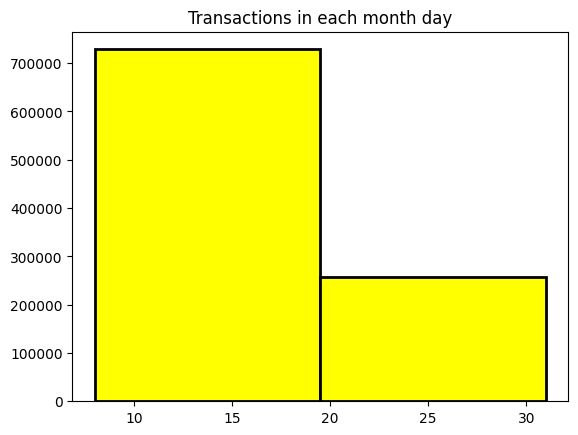

In [ ]:
plt.hist(df['TransactionDate'].dt.day, color='yellow', edgecolor='black',bins = 2, linewidth=2)
plt.title('Transactions in each month day')
plt.show()

In [ ]:
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDay'] = df['TransactionDate'].dt.dayofweek
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Customer age,TransactionMonth,TransactionDay
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,31.0,2,0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,69.0,2,0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,29.0,2,0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,52.0,2,0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,38.0,2,0


In [ ]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Customer age,TransactionMonth,TransactionDay
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,31.0,2,0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,69.0,2,0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,29.0,2,0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,52.0,2,0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,38.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,35.0,9,6
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,34.0,9,6
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,36.0,9,6
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,47.0,9,6


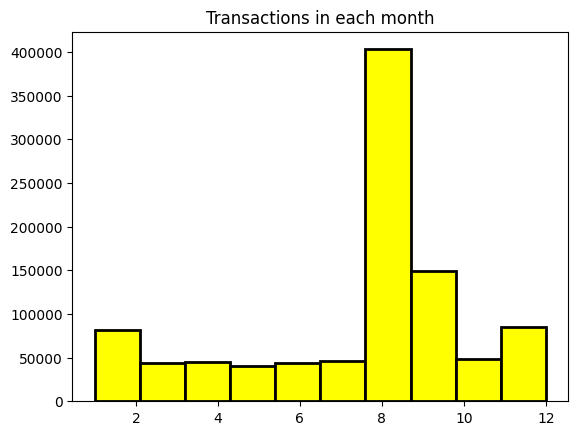

In [ ]:
plt.hist(df['TransactionMonth'], color='yellow', edgecolor='black',bins = 10, linewidth=2)
plt.title('Transactions in each month')
plt.show()

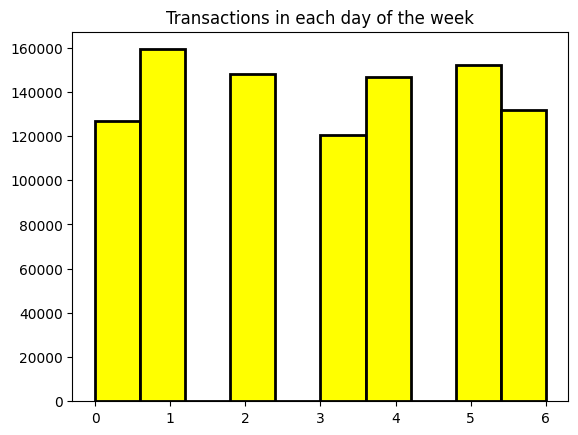

In [ ]:
plt.hist(df['TransactionDay'], color='yellow', edgecolor='black',bins = 10, linewidth=2)
plt.title('Transactions in each day of the week')
plt.show()

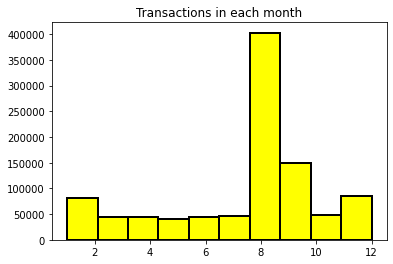

In [ ]:
plt.hist(df['TransactionMonth'], color='yellow', edgecolor='black',bins = 10, linewidth=2)
plt.title('Transactions in each month')
plt.show()

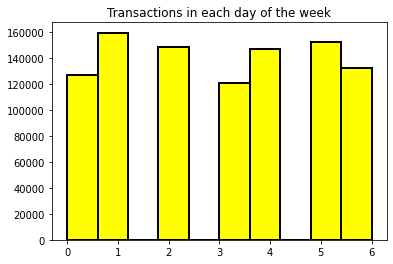

In [ ]:
plt.hist(df['TransactionDay'], color='yellow', edgecolor='black',bins = 10, linewidth=2)
plt.title('Transactions in each day of the week')
plt.show()

<AxesSubplot:ylabel='TransactionAmount (INR)'>

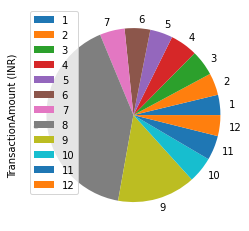

In [ ]:
pd.options.plotting.backend = 'matplotlib'

df.groupby(df['TransactionMonth']).sum().plot(kind='pie', y='TransactionAmount (INR)')

<AxesSubplot:ylabel='TransactionAmount (INR)'>

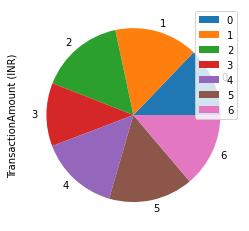

In [ ]:
df.groupby(df['TransactionDay']).sum().plot(kind='pie', y='TransactionAmount (INR)')

<AxesSubplot:ylabel='TransactionAmount (INR)'>

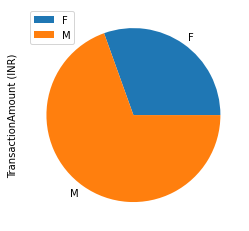

In [ ]:
df.groupby(df['CustGender']).sum().plot(kind='pie', y='TransactionAmount (INR)')

**Apply label encoder on "CustGender" and "CustLocation" columns**

In [ ]:
le = preprocessing.LabelEncoder()
  
df['CustGender']= le.fit_transform(df['CustGender'])
df['CustLocation']= le.fit_transform(df['CustLocation'])
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Customer age,TransactionMonth,TransactionDay
0,T1,C5841053,1994-10-01,0,3117,17819.05,2016-02-08,143207,25.0,28.0,2,0
1,T2,C2142763,1957-04-04,1,3174,2270.69,2016-02-08,141858,27999.0,66.0,2,0
2,T3,C4417068,1996-11-26,0,4625,17874.44,2016-02-08,142712,459.0,26.0,2,0
3,T4,C5342380,1973-09-14,0,4625,866503.21,2016-02-08,142714,2060.0,49.0,2,0
4,T5,C9031234,1988-03-24,0,4965,6714.43,2016-02-08,181156,1762.5,35.0,2,0


**Drop unused columns**

In [ ]:
df = df.drop(['TransactionID','CustomerID','CustomerDOB','TransactionDate','TransactionTime'],axis=1)
df

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Customer age,TransactionMonth,TransactionDay
0,0,3117,17819.05,25.0,28.0,2,0
1,1,3174,2270.69,27999.0,66.0,2,0
2,0,4625,17874.44,459.0,26.0,2,0
3,0,4625,866503.21,2060.0,49.0,2,0
4,0,4965,6714.43,1762.5,35.0,2,0
...,...,...,...,...,...,...,...
1048562,1,5066,7635.19,799.0,32.0,9,6
1048563,1,4943,27311.42,460.0,31.0,9,6
1048564,1,2954,221757.06,770.0,33.0,9,6
1048565,1,7979,10117.87,1000.0,44.0,9,6


In [ ]:
columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','Customer age','TransactionMonth','TransactionDay']

In [ ]:
df[columns_names].describe().T

,count,mean,std,min,25%,50%,75%,max
CustGender,985322.0,0.723067,0.447483,0.0,0.0000,1.0,1.00,1.000000e+00
CustLocation,985322.0,3596.407063,2084.145964,0.0,1805.0000,3531.0,5066.00,8.163000e+03
CustAccountBalance,985322.0,106061.188580,817905.353760,0.0,4582.1325,16006.3,53759.08,1.150355e+08
TransactionAmount (INR),985322.0,1452.425149,6139.765064,0.0,151.0000,431.0,1125.00,1.560035e+06
Customer age,985322.0,37.334999,8.764056,2.0,31.0000,35.0,41.00,1.000000e+02
TransactionMonth,985322.0,7.349036,2.633786,1.0,6.0000,8.0,9.00,1.200000e+01
TransactionDay,985322.0,2.999948,1.981179,0.0,1.0000,3.0,5.00,6.000000e+00


In [ ]:
df[df['TransactionAmount (INR)'] == 0].count()

CustGender                 708
CustLocation               708
CustAccountBalance         708
TransactionAmount (INR)    708
Customer age               708
TransactionMonth           708
TransactionDay             708
dtype: int64

In [ ]:
df = df.drop(df[df['TransactionAmount (INR)'] == 0].index,axis = 0)

In [ ]:
df[df['TransactionAmount (INR)'] == 0].count()

CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionAmount (INR)    0
Customer age               0
TransactionMonth           0
TransactionDay             0
dtype: int64

In [ ]:
df['CustLocation'].value_counts()

4625    97605
672     77688
5066    76307
2689    70447
1805    67263
        ...  
6891        1
3242        1
844         1
5905        1
2985        1
Name: CustLocation, Length: 8161, dtype: int64

**Plotting histograms of the columns to know if data is skewed or not**

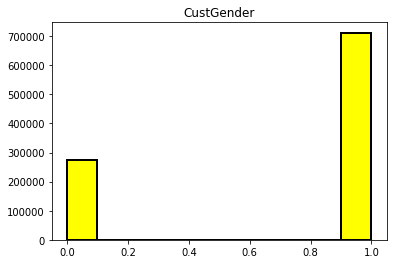

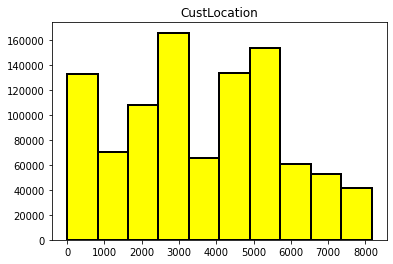

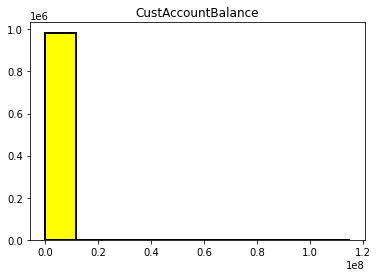

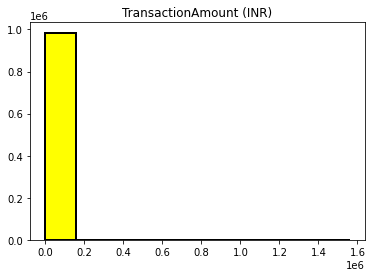

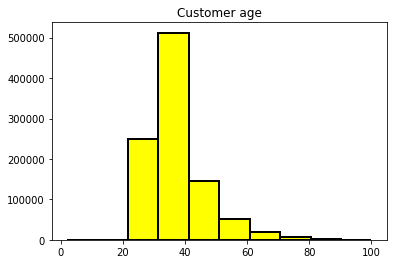

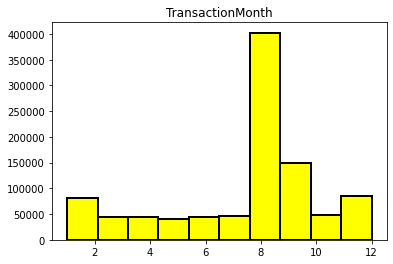

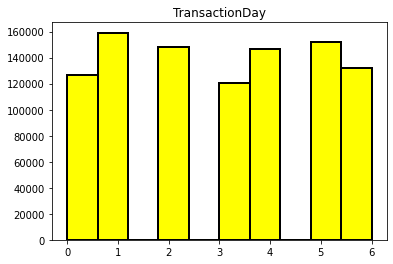

In [ ]:
for i in columns_names:
    plt.hist(df[i], color='yellow', edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()

**Plotting boxplots of the columns to know if each column has outliers or not**

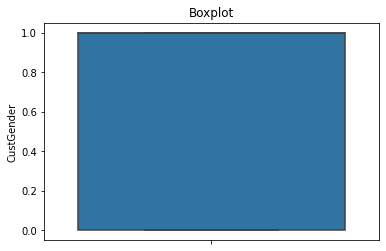

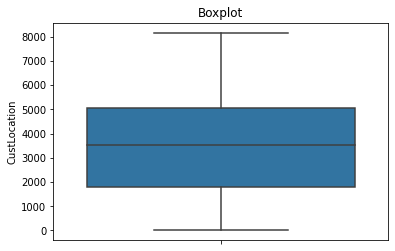

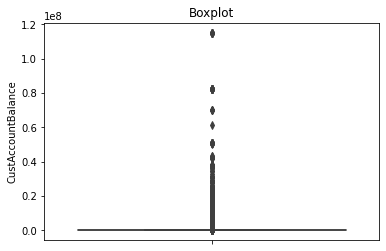

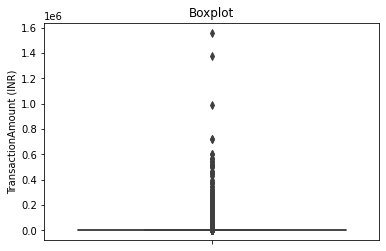

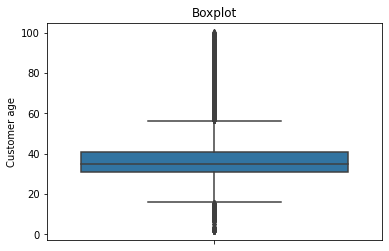

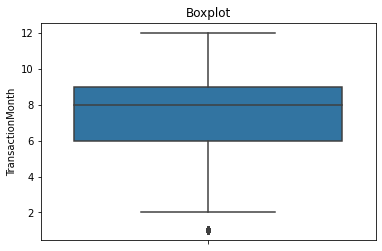

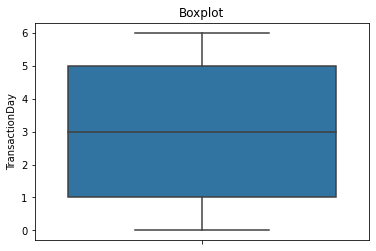

In [ ]:
for i in columns_names:
    sns.boxplot(y=df[i])
    plt.title('Boxplot')
    plt.show()

**Apply Normalization method "Standard scaler"**

In [ ]:
s = StandardScaler()
df = s.fit_transform(df)
df = pd.DataFrame(df,columns=columns_names)
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Customer age,TransactionMonth,TransactionDay
0,-1.615620,-0.230053,-0.107862,-0.232580,-1.065215,-2.031003,-1.514184
1,0.618957,-0.202705,-0.126881,4.322077,3.270823,-2.031003,-1.514184
2,-1.615620,0.493473,-0.107794,-0.161917,-1.293428,-2.031003,-1.514184
3,-1.615620,0.493473,0.930237,0.098754,1.331016,-2.031003,-1.514184
4,-1.615620,0.656602,-0.121445,0.050316,-0.266471,-2.031003,-1.514184


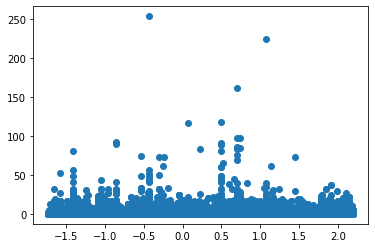

In [ ]:
plt.scatter(df.CustLocation, df['TransactionAmount (INR)'])

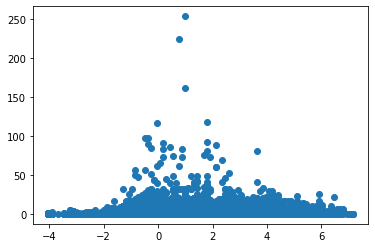

In [ ]:
plt.scatter(df['Customer age'], df['TransactionAmount (INR)'])

In [ ]:
X = df[['Customer age','TransactionAmount (INR)']].values
Y = df[['CustLocation','TransactionAmount (INR)']].values

<h1> Centroid-based clustering</h1>

<h3>K-Means algorithm</h3>

- Select the number of clusters K
- Initialize the K centroids
- Assign each data point to their closest centroid 
- For each cluster calculate the average of its assigned examples and let it the new position for that centroid
- Reassign each data example to the new closest centroid of each cluster
- Update the centroid position
- The model is ready

In [ ]:
!pip install yellowbrick

In [ ]:
import random
from yellowbrick.cluster import KElbowVisualizer
model = KMeans( random_state = 42)

visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
visualizer2 = KElbowVisualizer(model, k=(2,30), timings=False)

<h3> Centroid-based clustering based on customer's age</h3>

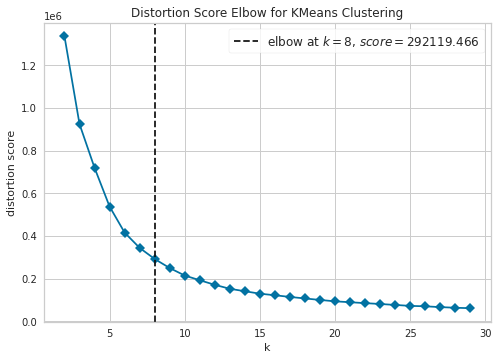

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer.fit(X)
visualizer.show()

In [ ]:
kmeans_x = KMeans(n_clusters = 8, random_state = 42)
x_kmeans = kmeans_x.fit_predict(X)

<h3> Centroid-based clustering based on customer's location</h3>

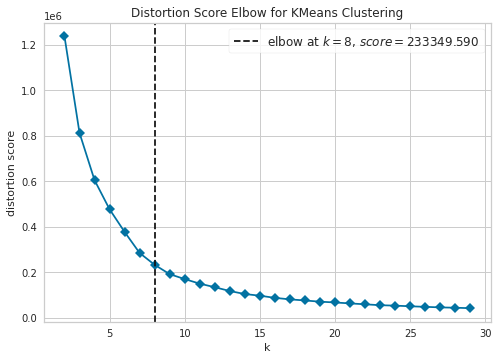

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer2.fit(Y)
visualizer2.show()

distortion : the sum of squared distances of all points to their assigned cluster centers.

In [ ]:
kmeans_y = KMeans(n_clusters = 8, random_state = 42)
y_kmeans = kmeans_y.fit_predict(Y)

In [ ]:
centroids_x = kmeans_x.cluster_centers_
centroids_y = kmeans_y.cluster_centers_

print(centroids_x,centroids_y)

[[-7.31109639e-01 -1.19551772e-01]
 [ 1.23775248e+00  2.34871421e-02]
 [ 9.28727163e-01  1.57271255e+01]
 [ 4.95265886e-01  4.14654461e+00]
 [ 3.19301381e+00  8.56725737e-02]
 [ 9.12626672e-01  2.13117796e+02]
 [ 8.11532535e-01  7.05010589e+01]
 [ 9.38462014e-02 -6.04776135e-02]] [[-1.20365403e+00 -7.88499460e-02]
 [-3.24155991e-01 -7.56887544e-02]
 [-7.96405484e-02  1.55697969e+01]
 [ 1.73500882e+00 -8.26165110e-02]
 [ 7.51650299e-03  4.00860688e+00]
 [ 6.61296156e-01 -6.21962175e-02]
 [ 4.49171948e-01  2.13117796e+02]
 [ 2.69431747e-02  6.97953240e+01]]


In [ ]:
df['cluster_age_km'] = x_kmeans
df['cluster_location_km'] = y_kmeans
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Customer age,TransactionMonth,TransactionDay,cluster_age_km,cluster_location_km
0,-1.615620,-0.230053,-0.107862,-0.232580,-1.065215,-2.031003,-1.514184,0,1
1,0.618957,-0.202705,-0.126881,4.322077,3.270823,-2.031003,-1.514184,3,4
2,-1.615620,0.493473,-0.107794,-0.161917,-1.293428,-2.031003,-1.514184,0,5
3,-1.615620,0.493473,0.930237,0.098754,1.331016,-2.031003,-1.514184,1,5
4,-1.615620,0.656602,-0.121445,0.050316,-0.266471,-2.031003,-1.514184,7,5


In [ ]:
# get centroids
cen_xx = [i[0] for i in centroids_x] 
cen_xy = [i[1] for i in centroids_x]

cen_yx = [i[0] for i in centroids_y] 
cen_yy = [i[1] for i in centroids_y]

## add to df
df['cen_xx'] = df.cluster_age_km.map({0:cen_xx[0], 1:cen_xx[1], 2:cen_xx[2],3:cen_xx[3], 4:cen_xx[4], 5:cen_xx[5],6:cen_xx[6], 7:cen_xx[7]})
df['cen_xy'] = df.cluster_age_km.map({0:cen_xy[0], 1:cen_xy[1], 2:cen_xy[2],3:cen_xy[3], 4:cen_xy[4], 5:cen_xy[5],6:cen_xy[6], 7:cen_xy[7]})

df['cen_yx'] = df.cluster_location_km.map({0:cen_yx[0], 1:cen_yx[1], 2:cen_yx[2],3:cen_yx[3], 4:cen_yx[4], 5:cen_yx[5],6:cen_yx[6], 7:cen_yx[7]})
df['cen_yy'] = df.cluster_location_km.map({0:cen_yy[0], 1:cen_yy[1], 2:cen_yy[2],3:cen_yy[3], 4:cen_yy[4], 5:cen_yy[5],6:cen_yy[6], 7:cen_yy[7]})
# Makes it easy to calculate distances to centroids, or to visualize points with their cluster centers.
# define and map colors
colors = ['red', 'yellow', 'grey', 'green','blue','orange','pink','brown']
df['color_age_km'] = df.cluster_age_km.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3],4:colors[4],5:colors[5],6:colors[6],7:colors[7]})
df['color_location_km'] = df.cluster_location_km.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3],4:colors[4],5:colors[5],6:colors[6],7:colors[7]})

Visualization:

You can plot data points colored by cluster and overlay centroids.

Helps see how well KMeans separated your data.

Distance Calculations:

With centroid coordinates mapped to each row, you can compute distances from each point to its cluster center for analysis.

Data Analysis / Reporting:

You can segment or filter based on clusters easily.

Useful in marketing, regional analysis, or demographic studies.

(-0.5, 20.0)

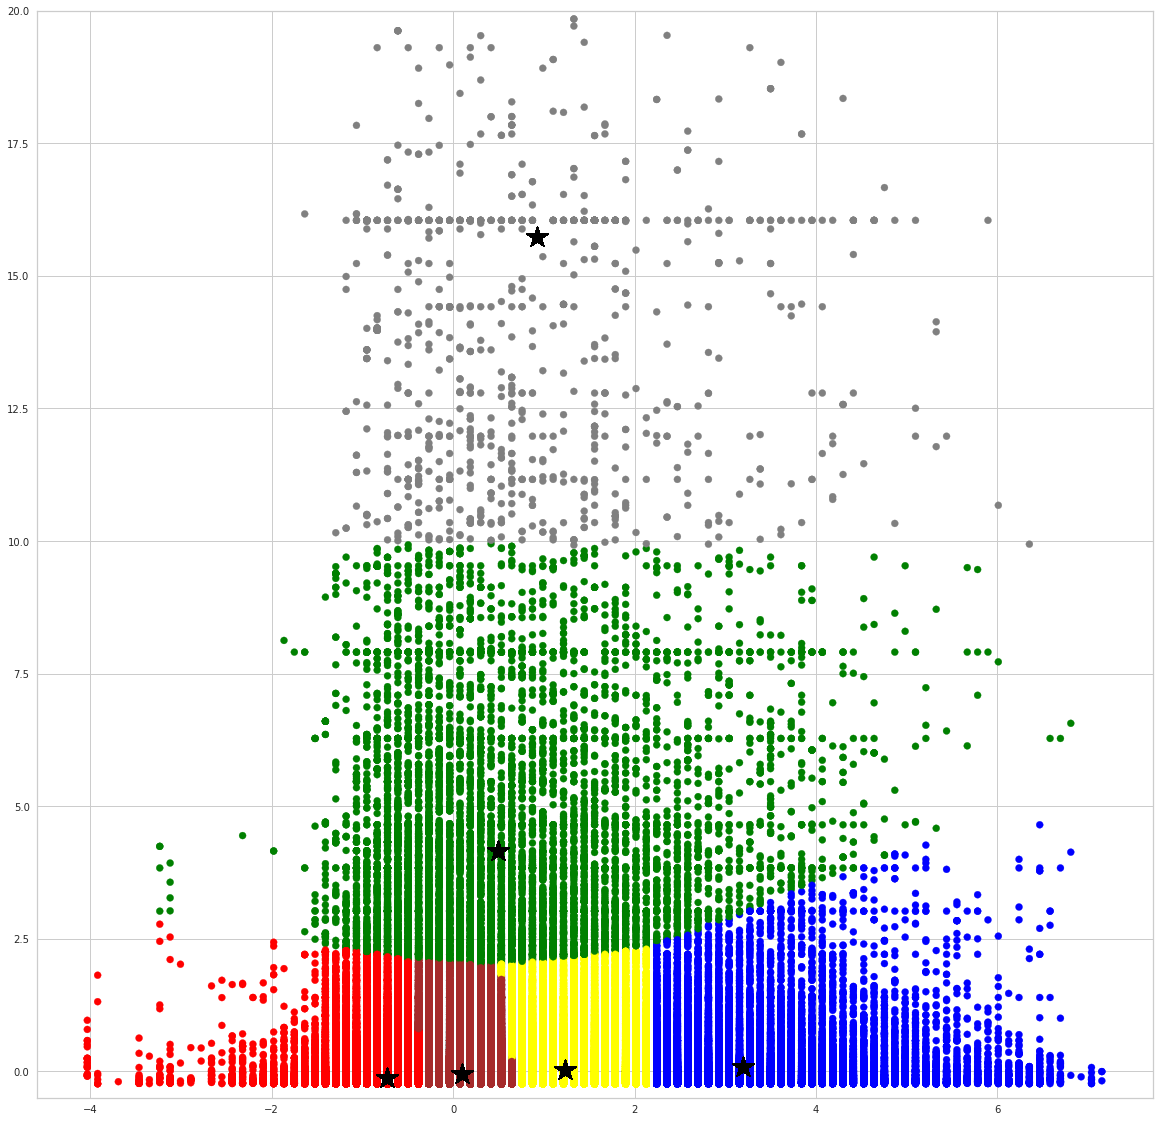

In [ ]:
plt.figure(num=None, figsize=(20, 20), facecolor='w', edgecolor='k')
plt.scatter(df['Customer age'], df['TransactionAmount (INR)'], c=df.color_age_km)
plt.scatter(df['cen_xx'], df['cen_xy'],marker = '*',s=500, c='black')
#plt.xlim([0, 100])
plt.ylim([-0.5, 20])

(-0.5, 20.0)

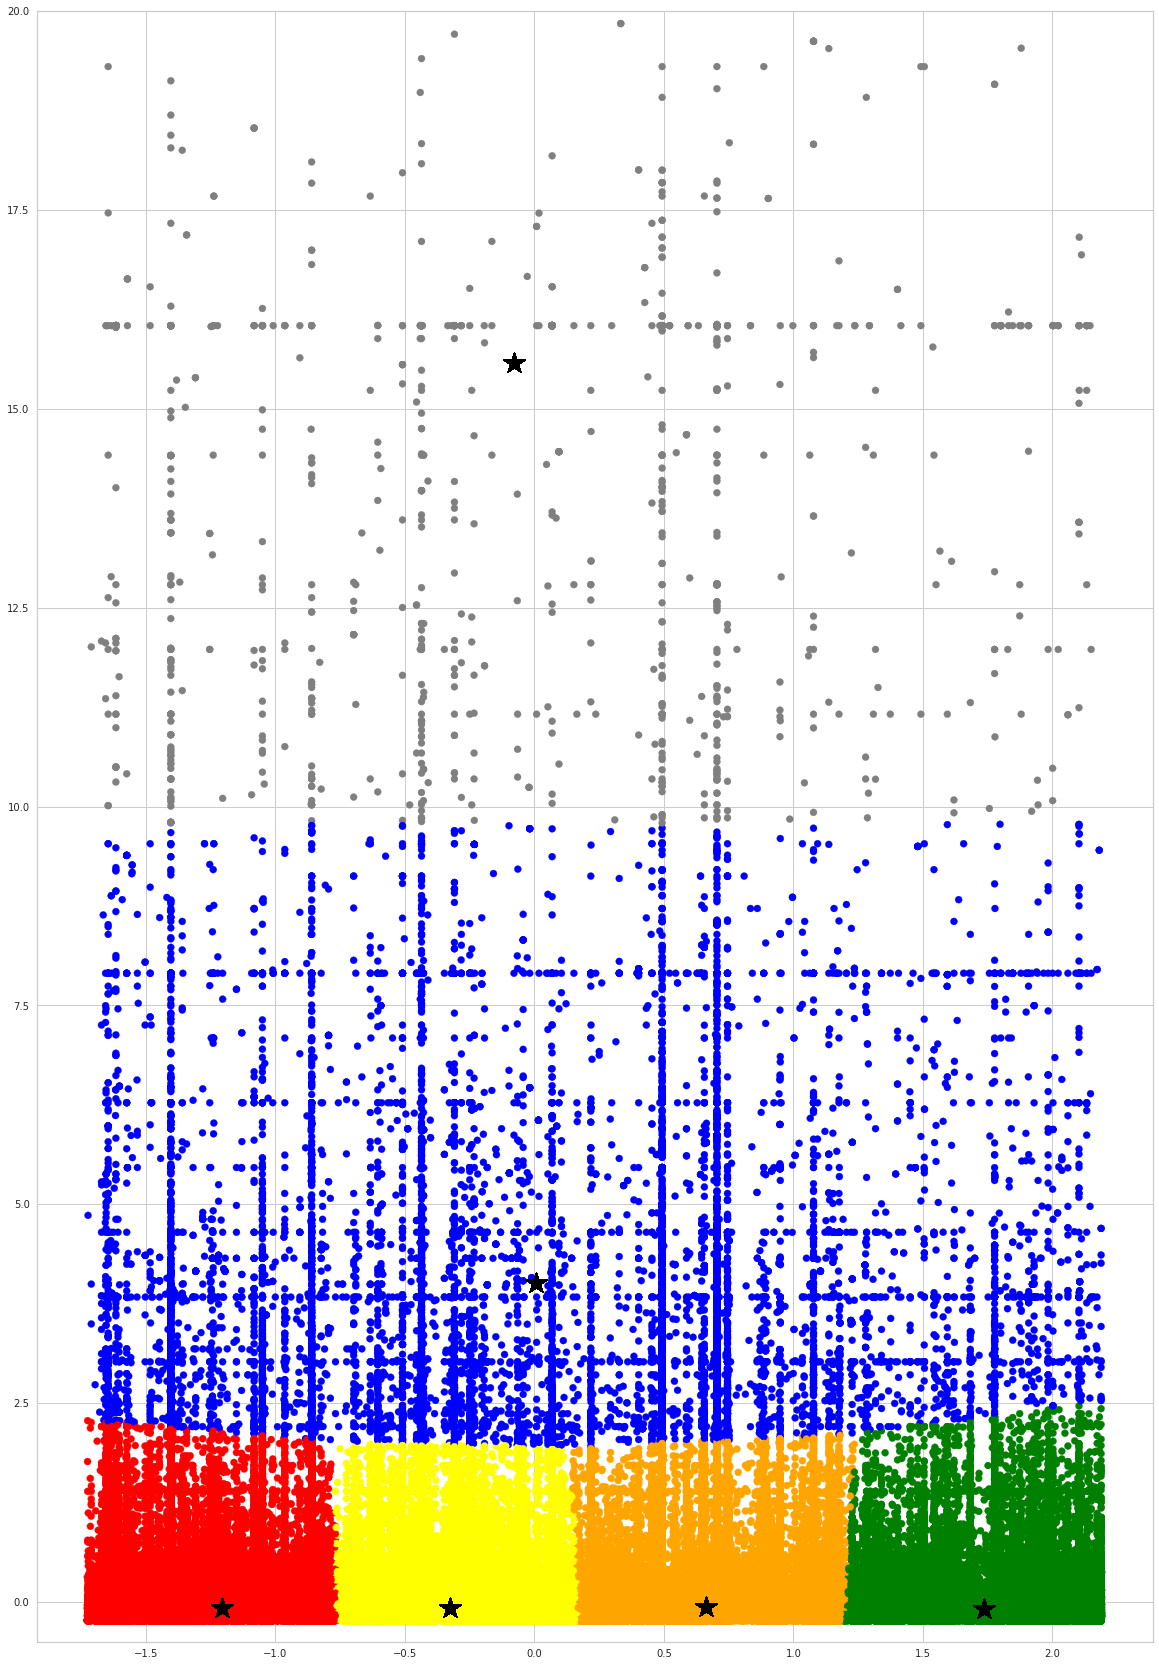

In [ ]:
plt.figure(num=None, figsize=(20, 30), facecolor='w', edgecolor='k')
plt.scatter(df['CustLocation'], df['TransactionAmount (INR)'], c=df.color_location_km)
plt.scatter(df['cen_yx'], df['cen_yy'],marker = '*',s=500, c='black')
#plt.xlim([0, 8500])
plt.ylim([-0.5, 20])

<h1>Hierarchical clustering</h1>

Hierarchical clustering is where you build a dendrogram to represent data, where each group links to two or more successor groups. The groups are nested and organized as a tree, which ideally ends up as a meaningful classification scheme.

Each node in the cluster tree contains a group of similar data; Nodes group on the graph next to other, similar nodes. Clusters at one level join with clusters in the next level up, using a degree of similarity. The process carries on until all nodes are in the tree, which gives a visual snapshot of the data contained in the whole set. The total number of clusters is not predetermined before you start the tree creation.

<h3>Agglomerative</h3>

This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.


#### Divisive: 
"top down "

<h3>Hierarchical clustering based on customer's age</h3>

In [ ]:
X_H = pd.DataFrame(X).sample(20000)

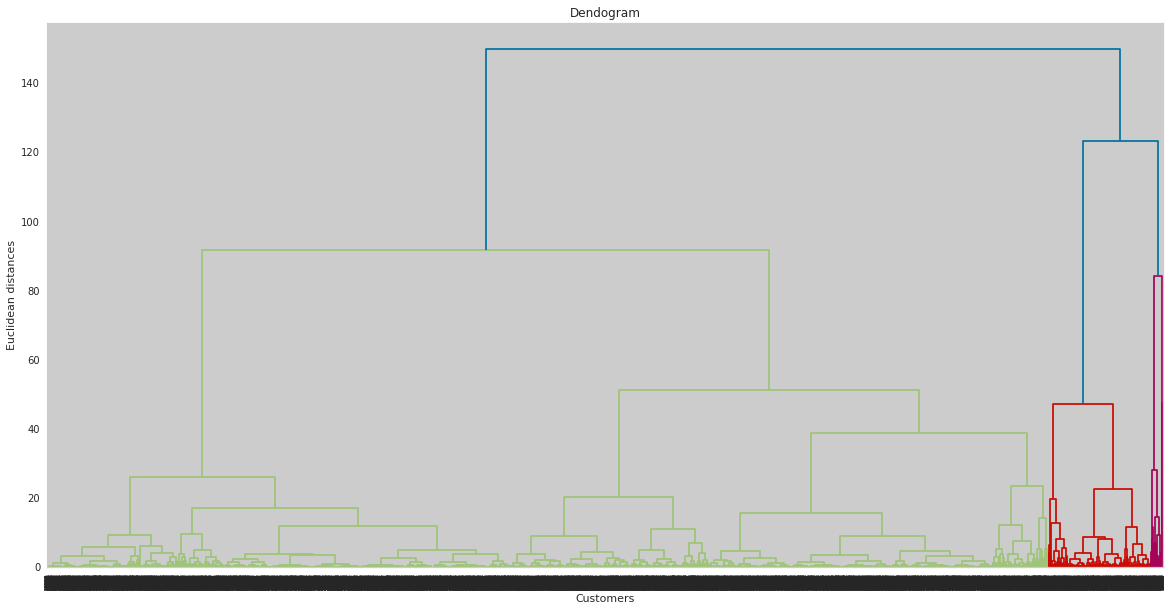

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 10))
dendogram_age = sch.dendrogram(sch.linkage(X_H, method='ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [ ]:
unique_colors_age = set(dendogram_age['color_list'])
num_clusters_age = len(unique_colors_age)-1
#Subtracts 1 because the dendrogram may include a default color for merged branches above the threshold.
print("Optimal number of clusters is : ", num_clusters_age)

Optimal number of clusters is :  3


In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster_age = AgglomerativeClustering(n_clusters=num_clusters_age, affinity='euclidean', linkage='ward')
cluster_age.fit_predict(X_H)

array([0, 0, 0, ..., 0, 2, 0])

Noise points are data points that don’t clearly belong to any cluster. They are often considered outliers or anomalies in clustering.

(-0.5, 6.0)

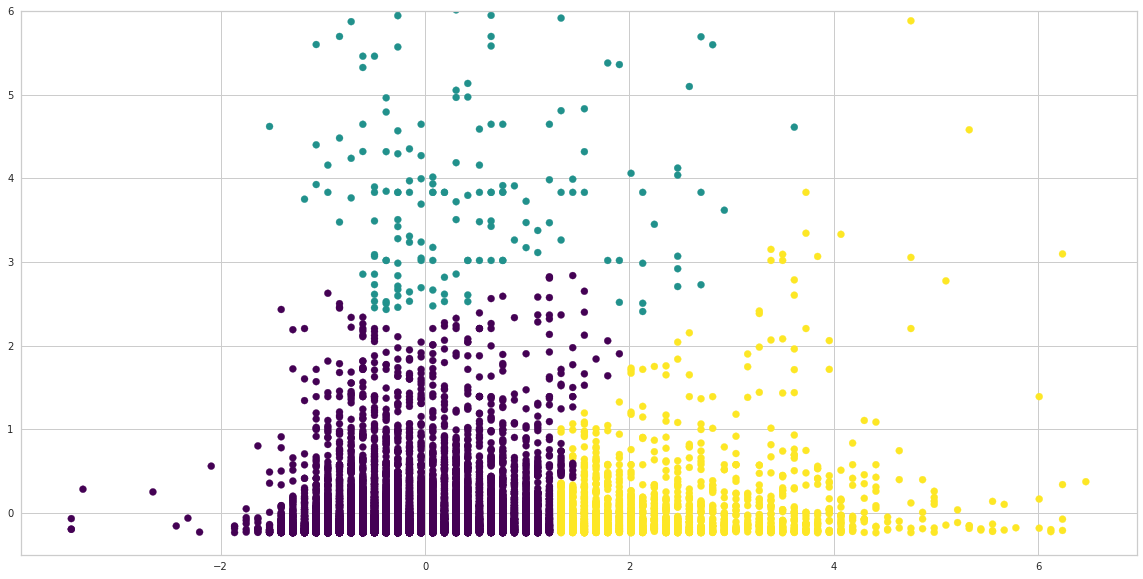

In [ ]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.scatter(X_H[0], X_H[1], c=cluster_age.labels_, cmap='viridis');
#plt.xlim(-1,1.5)
plt.ylim(-0.5,6)

<h3>Hierarchical based on customer's location</h3>

In [ ]:
Y_H = pd.DataFrame(Y).sample(20000)

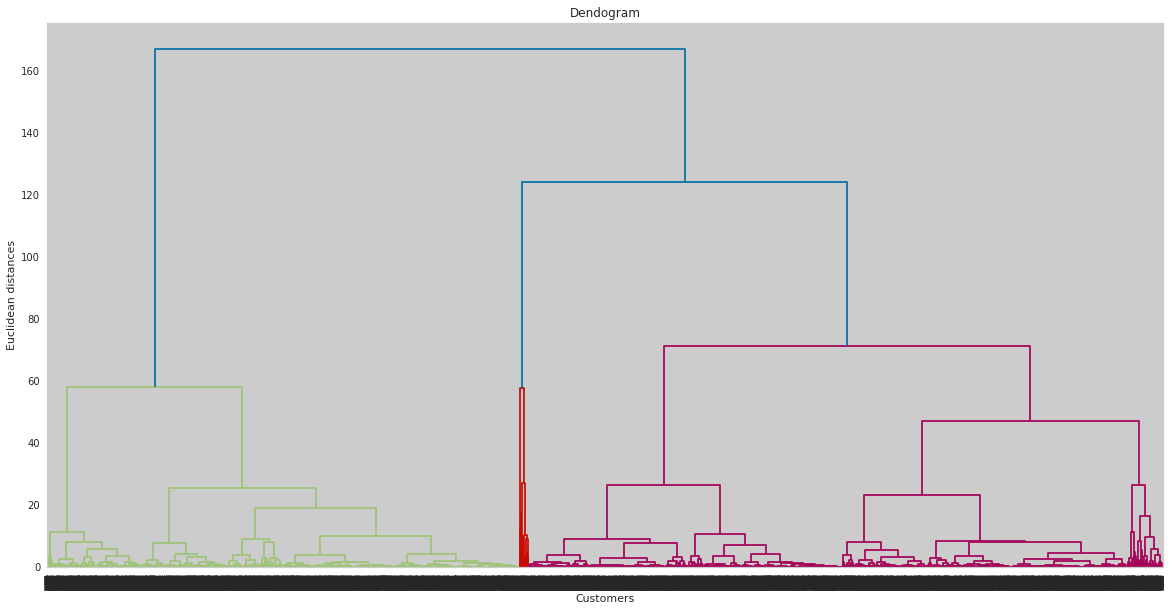

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 10))

dendogram_loc = sch.dendrogram(sch.linkage(Y_H, method='ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [ ]:
unique_colors_loc = set(dendogram_loc['color_list'])
num_clusters_loc = len(unique_colors_loc)-1
print("Optimal number of clusters is : ", num_clusters_loc)

Optimal number of clusters is :  3


In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster_loc = AgglomerativeClustering(n_clusters=num_clusters_loc, affinity='euclidean', linkage='ward')
cluster_loc.fit_predict(Y_H)

array([0, 0, 0, ..., 0, 0, 1])

(-0.25, 10.0)

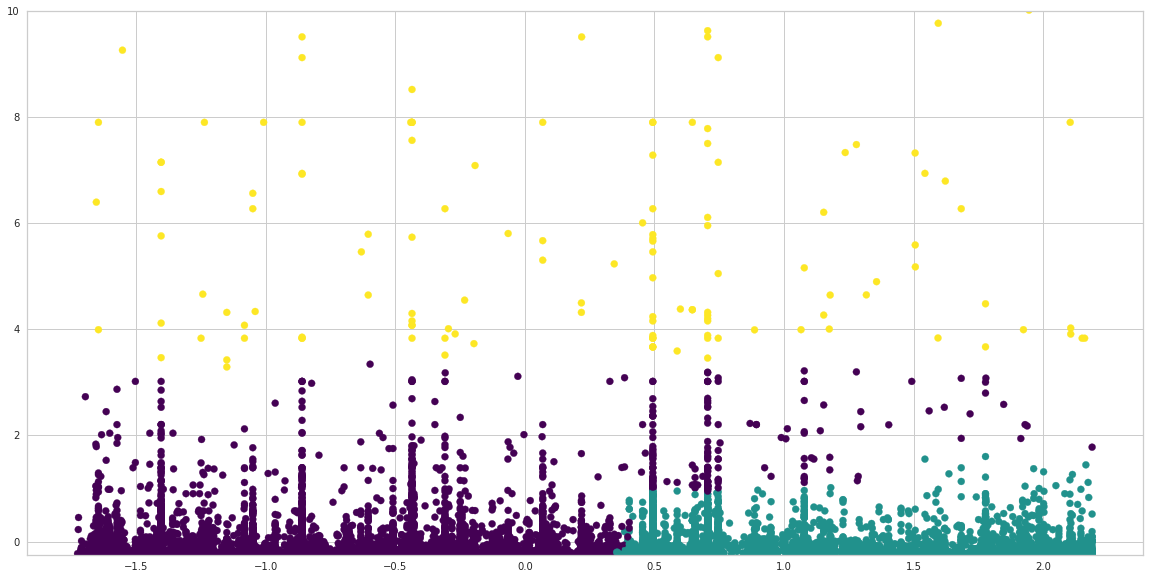

In [ ]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.scatter(Y_H[0], Y_H[1], c=cluster_loc.labels_, cmap='viridis');
#plt.xlim(-1,1.5)
plt.ylim(-0.25,10)

To do: Implement DBSCAN